BACKTEST -----------------------
WR: 57.00% | ROI: 6.30% | Drawdown: -6.20%
MedGain: 0.87 | MedLoss: -1.00 | EV: 0.06

REALIDADE -----------------------
WR: 36.54% | ROI: -32.35% | Drawdown: -16.65%
MedGain: 0.85 | MedLoss: -1.00 | EV: -0.32

Profit: -16.82 | Entradas: 52
Dias: 15 (19 totais)


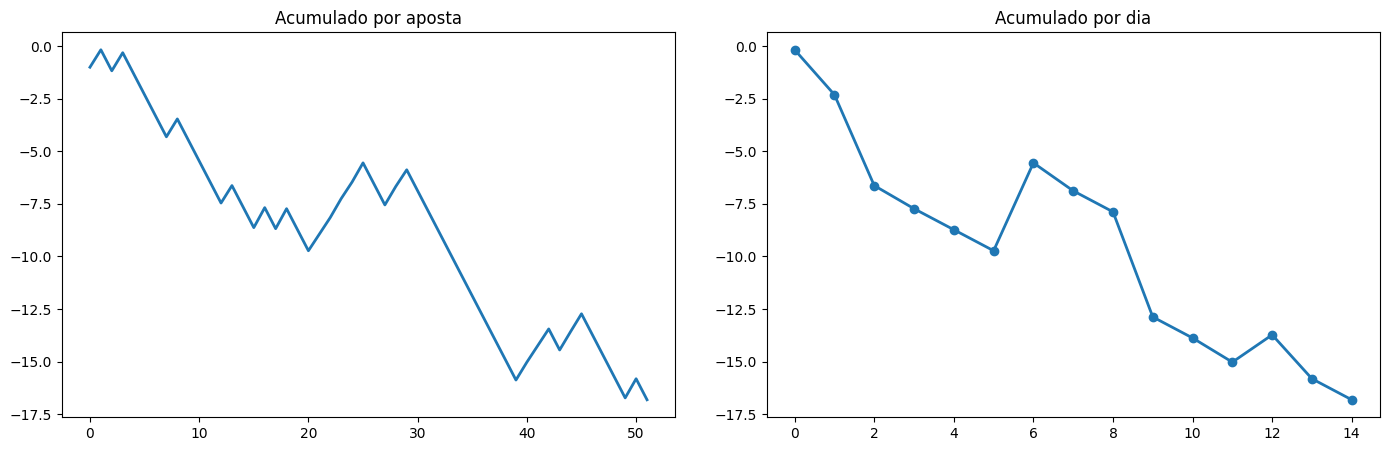


Dias --------------------------------------


,Date,Total_Profit,Odds_Under,Acumulado
0,2023-11-23,-0.17,2,-0.17
1,2023-11-24,-2.14,4,-2.31
2,2023-11-25,-4.32,8,-6.63
3,2023-11-26,-1.10,5,-7.73
4,2023-11-28,-1.00,1,-8.73
5,2023-11-30,-1.00,1,-9.73
6,2023-12-02,4.18,5,-5.55
7,2023-12-03,-1.33,5,-6.88
8,2023-12-04,-1.00,1,-7.88
9,2023-12-05,-5.00,5,-12.88



Jogos -------------------------------------


,Date,Home,Away,Home_Pts,Away_Pts,Odds_Under,Resultado,Profit,Acumulado
0,2023-11-23,Maccabi Tel Aviv,Barcelona,90,92,1.95,red,-1.00,-1.00
1,2023-11-23,USC,Seton Hall,71,63,1.83,green,0.83,-0.17
2,2023-11-24,Dynamo Moscow F,Spartak Moscow F,65,93,1.85,red,-1.00,-1.17
3,2023-11-24,Breidablik,Hamar,87,69,1.86,green,0.86,-0.31
4,2023-11-24,Neftyanik Omsk F,Enisey Krasnoyarsk F,56,77,1.85,red,-1.00,-1.31
5,2023-11-24,Caledonia Gladiators,Cheshire Phoenix,83,92,1.83,red,-1.00,-2.31
6,2023-11-25,Braga,Vasco Da Gama,97,84,1.85,red,-1.00,-3.31
7,2023-11-25,Monferrato,Urania Milano,97,83,1.86,red,-1.00,-4.31
8,2023-11-25,CSM Targu Jiu,Dinamo Bucharest,79,59,1.85,green,0.85,-3.46
9,2023-11-25,Taoyuan Leopards,Kaohsiung Aquas,110,95,1.85,red,-1.00,-4.46


In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import pandas as pd; pd.set_option('display.max_rows', None)
import glob
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import sys
sys.path.append('scripts/')
from Acompanhamento import *
METODO = 'under_v1'
TARGET = 'Back_Under'
ODDS = 'Odds_Under'
SPREAD = 1
STAKE = 1


# Dados de backtest
wr = 57
roi = 6.3
drawdown = -6.2
med_gain = 0.87
med_loss = -1.00
ev = 0.06
df_all = pd.DataFrame()
dias = glob.glob('apostas_do_dia/*')

for dia in dias:
    dia = dia.split('\\')[1]
    dia = dia.split('.')[0]
    caminho = glob.glob(f'apostas_do_dia/{dia}/*{METODO}*')
    if len(caminho) == 0:
        continue
    caminho = caminho[0]
    df = pd.read_csv(caminho)
    df_all = pd.concat([df_all, df])

temp = pd.read_csv('data/Entire_Season.csv')
df_all = pd.merge(df_all, temp[['Date', 'Home', 'Away', 'Home_Pts', 'Away_Pts']], on=['Date', 'Home', 'Away'], how='left')
df_all = df_all.dropna(subset=['Home_Pts', 'Away_Pts'])
df_all['Home_Pts'] = df_all['Home_Pts'].astype(int)
df_all['Away_Pts'] = df_all['Away_Pts'].astype(int)

df_all.loc[((df_all['Home_Pts'] + df_all['Away_Pts']) > df_all['Over_Line']), TARGET] = 0
df_all.loc[((df_all['Home_Pts'] + df_all['Away_Pts']) < df_all['Over_Line']), TARGET] = 1

df_all.loc[(df_all[TARGET] == 0), 'Profit'] = - STAKE
df_all.loc[(df_all[TARGET] == 1), 'Profit'] = ((df_all[ODDS] * SPREAD) - 1) * STAKE
df_all['Profit'] = df_all['Profit'].round(2)

print('BACKTEST -----------------------')
print(f'WR: {wr:.2f}% | ROI: {roi:.2f}% | Drawdown: {drawdown:.2f}%')
print(f'MedGain: {med_gain:.2f} | MedLoss: {med_loss:.2f} | EV: {ev:.2f}')

print('\nREALIDADE -----------------------')
df_odds, df_by_day = get_results(df_all, TARGET, ODDS)

print('\nDias --------------------------------------')
display(df_by_day)
print('\nJogos -------------------------------------')
display(df_odds)